# Decision Trees Tutorial

This tutorial is based on the practical exercises from Chapter 6 of "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow" by Aurélien Géron, 2019.

## Training a Decision Tree

Let's use the Iris Dataset to illustrate how to create, train and visualize a Decision Tree classifier.

This dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

### Load Iris dataset

Let's load the data and work only with the last two features (Petal Length and Petal Width) for illustration purposes.

In [39]:
# Load dataset from scikit-learn
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data[:, 2:] # petal length and width
y_iris = iris.target

### Plot first two features

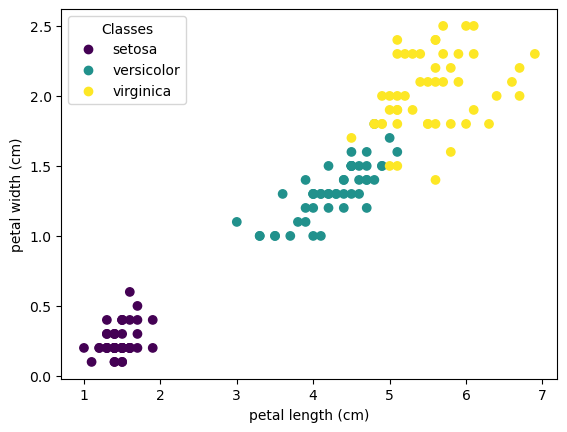

In [40]:
# Visualize first two features colour-coded by iris class
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(X_iris[:, 0], X_iris[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, title="Classes")

### Create Decision Tree

Import and create a decision tree object. Set the maximum depth of the tree to 2.

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Plot Tree

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

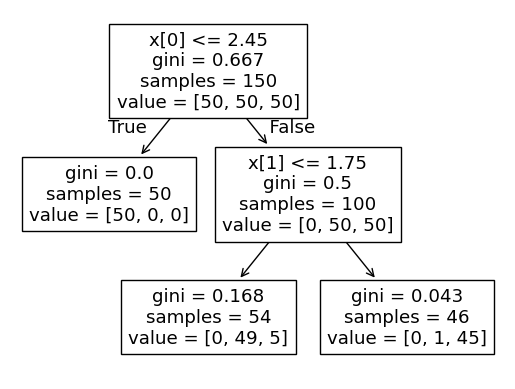

In [42]:
from sklearn.tree import plot_tree

plot_tree(tree_clf)

For more information on how to interpret the decision tree structure, see here:
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

### Making predictions

If we have a new flower (data point) with petal length = 5 and petal width = 1.5, what is the prediction for this flower?

In [47]:
new_data = [5, 1.5]
clss = tree_clf.predict([new_data])
print(iris.target_names[clss])


['versicolor']


### Training accuracy
Estimate the total accuracy on the training data

In [52]:
tree_clf.score(X_iris, y_iris)

0.96

### Feature Importance

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

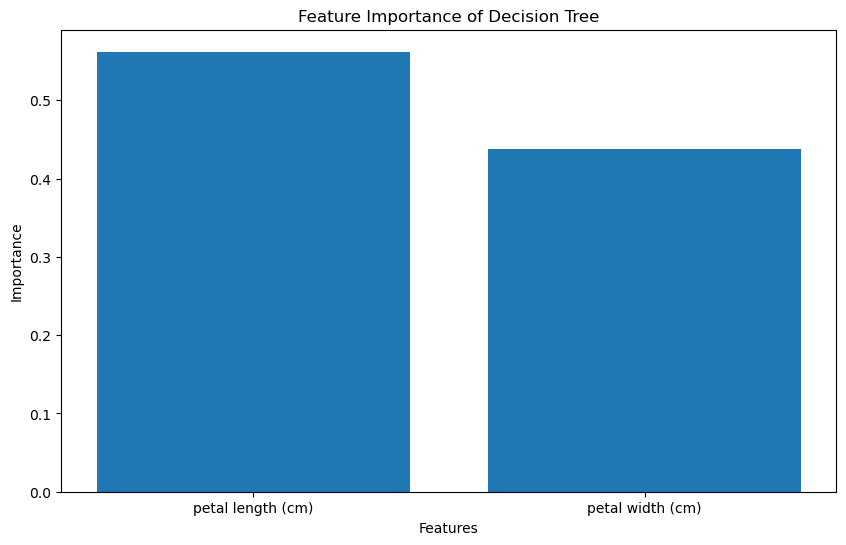

In [57]:
feature_importances = tree_clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=iris.feature_names[2:])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Decision Tree')
plt.show()

### Regularizing Hyperparameters

In general, increasing the min_ hyperparameters (e.g., min_samples_lead) or reducing the max_ hyperparameters (e.g., max_depth) will regularise the tree, preventing overfitting.

Let's try two different decision trees models on a different dataset. One with default hyperparameters (min_samples_leaf=1) and one with min_samples_leaf = 5.

In [66]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

Which one do you think will have a higher accuracy on test data?

In [65]:
# Load test data
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)

In [64]:
# Accuracy for tree 1
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [63]:
# Accuracy for tree 2
tree_clf2.score(X_moons_test, y_moons_test)

0.92